In [ ]:
pip install researchpy


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator           
%matplotlib inline 
import seaborn as sns   

import scipy.stats as ss
from scipy import stats 
from scipy.stats import skew, boxcox_normmax, norm
from scipy.stats import chi2_contingency
from researchpy import crosstab

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
train_data=pd.read_csv("train.csv")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
train_data[(train_data['Married'].isnull())] # For Finding Null values in the attributes



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [ ]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
numerical_columns = train_data.dtypes[train_data.dtypes != 'object'].index
numerical_columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [ ]:
categorical_columns = train_data.dtypes[train_data.dtypes == 'object'].index
categorical_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Univariate Analysis: Numerical Features

Skewness of  ApplicantIncome :  6.539513113994625
Kurtosis of  ApplicantIncome :  60.54067593369113
---------------------------
Skewness of  CoapplicantIncome :  7.491531216657306
Kurtosis of  CoapplicantIncome :  84.95638421103374
---------------------------
Skewness of  LoanAmount :  2.677551679256059
Kurtosis of  LoanAmount :  10.40153349029416
---------------------------
Skewness of  Loan_Amount_Term :  -2.362414124216269
Kurtosis of  Loan_Amount_Term :  6.673473692814259
---------------------------
Skewness of  Credit_History :  -1.8823610612186696
Kurtosis of  Credit_History :  1.5487626683496112
---------------------------


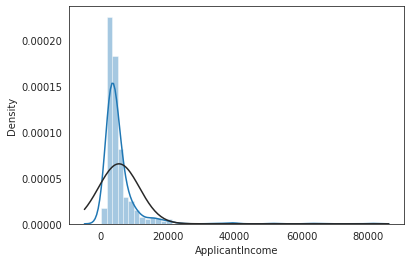

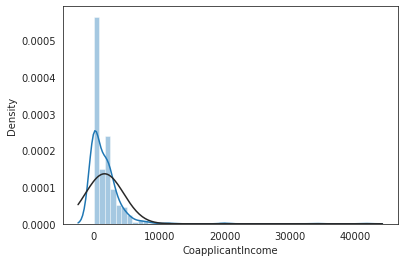

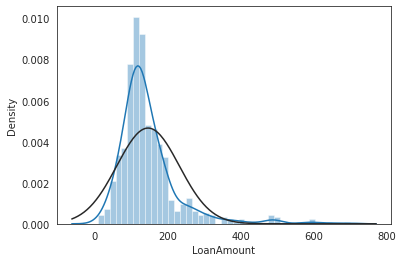

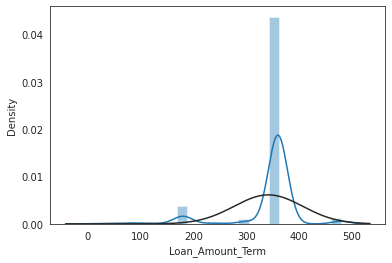

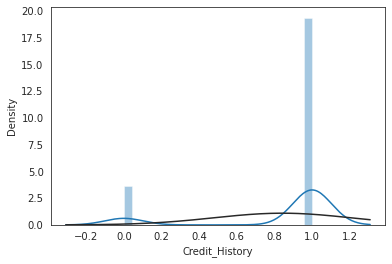

In [ ]:
for col in numerical_columns:
  print("Skewness of ", col,": " , train_data[col].skew());
  print("Kurtosis of ",col,": " , train_data[col].kurtosis());
  print("---------------------------")
  sns.set_style('white');
  plt.figure();
  sns.distplot(train_data[col], fit = norm); 

In [ ]:
print(train_data['Credit_History'].unique())
print("---"*30)
print(train_data['Loan_Amount_Term'].unique())

[1.0 0.0 nan]
------------------------------------------------------------------------------------------
[360.0 120.0 240.0 nan 180.0 60.0 300.0 480.0 36.0 84.0 12.0]


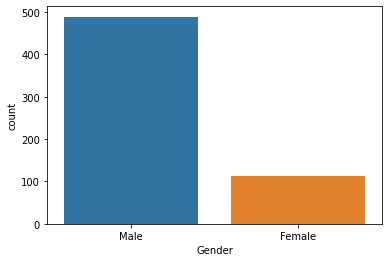

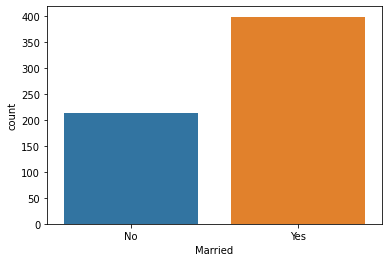

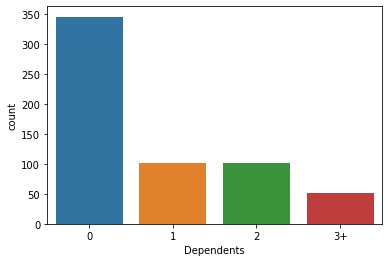

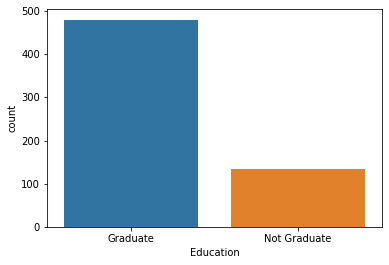

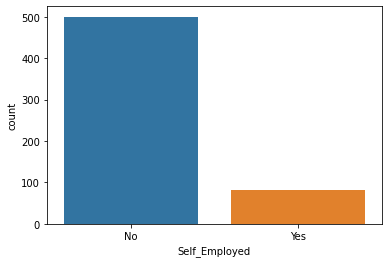

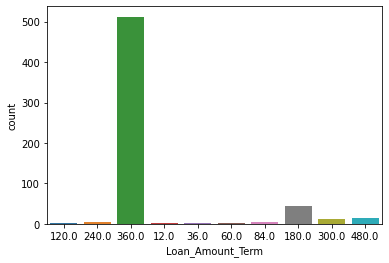

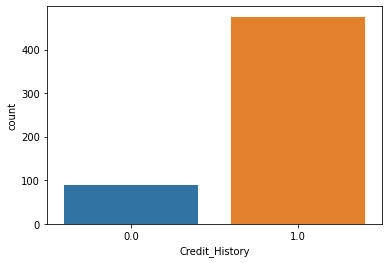

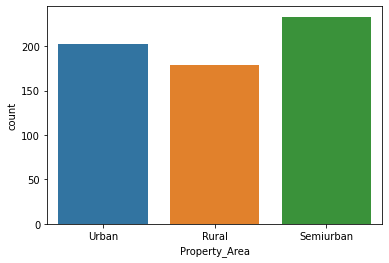

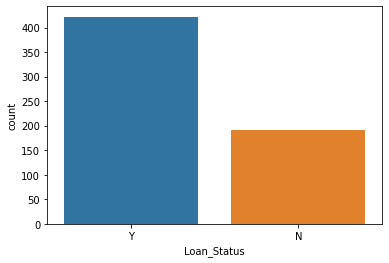

<Figure size 432x288 with 0 Axes>

In [ ]:
for col in categorical_columns:
  sns.countplot(train_data[col]); 
  plt.figure();


In [ ]:
train_data['Loan_Amount_Term'] = train_data['Loan_Amount_Term'].astype(object)
train_data['Credit_History'] = train_data['Credit_History'].astype(object)

In [ ]:
numerical_columns = train_data.dtypes[train_data.dtypes != 'object'].index
categorical_columns = train_data.dtypes[train_data.dtypes == 'object'].index

In [ ]:
categorical_columns = categorical_columns.drop('Loan_ID')

Bi-Variate Analysis : Numerical Features


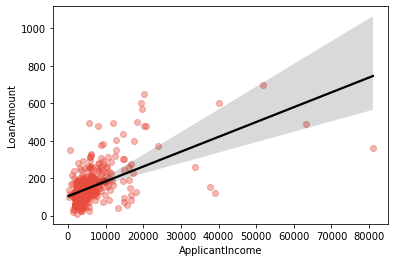

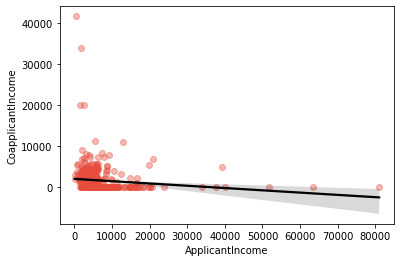

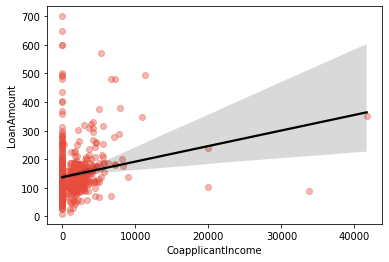

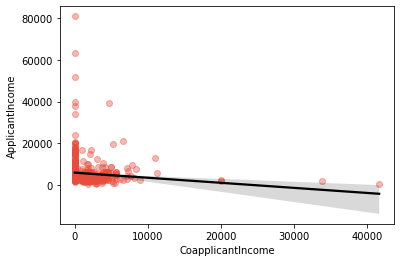

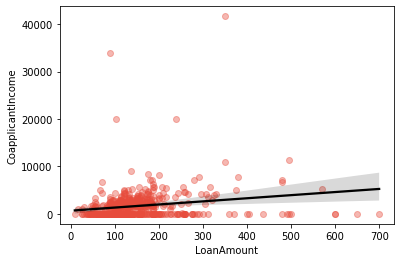

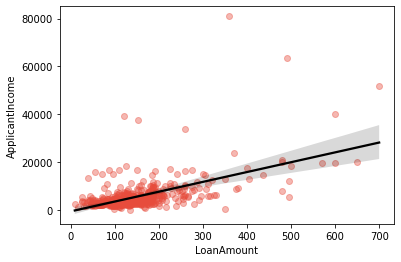

<Figure size 432x288 with 0 Axes>

In [ ]:
def srt_reg(df):
    for i in train_data[[col for col in numerical_columns]]:
      for k in train_data[[col for col in numerical_columns[::-1]]]:
        if i == k:
          continue;
        sns.regplot(x=i, y=k, data=df, color='#e74c3c', line_kws={'color': 'black'}, scatter_kws={'alpha':0.4})
        plt.figure();
     
srt_reg(train_data)

Bi-Variate Analysis: Categorical Features

In [ ]:
def cross_tab(col, df):
  cat = df.dtypes[train_data.dtypes == 'object'].index
  for i in cat:
        if i == col:
          continue;
        print(pd.crosstab(index = train_data[i], columns = train_data[col], normalize='index'))
        print("----"*30)

cross_tab('Loan_Status', train_data)

Loan_Status    N    Y
Loan_ID              
LP001002     0.0  1.0
LP001003     1.0  0.0
LP001005     0.0  1.0
LP001006     0.0  1.0
LP001008     0.0  1.0
...          ...  ...
LP002978     0.0  1.0
LP002979     0.0  1.0
LP002983     0.0  1.0
LP002984     0.0  1.0
LP002990     1.0  0.0

[614 rows x 2 columns]
------------------------------------------------------------------------------------------------------------------------
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252
------------------------------------------------------------------------------------------------------------------------
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.283920  0.716080
------------------------------------------------------------------------------------------------------------------------
Loan_Status         N         Y
Dependents                     
0      

Correlation Analysis

In [ ]:
# Chi-Square Test between Loan_Status and other features
def chi_sq(col, df):
  cat = df.dtypes[train_data.dtypes == 'object'].index
  for i in cat:
        if i == col:
          continue;
        cross = pd.crosstab(index = train_data[i], columns = train_data[col])
        chisq_res = chi2_contingency(cross)
        print("p - value for test between ", col, " and ", i, " is:", chisq_res[1])
        if chisq_res[1] > 0.05:
          print(col, " and ", i, " are not correlated.")
        print("----"*30)

chi_sq('Loan_Status', train_data)

p - value for test between  Loan_Status  and  Loan_ID  is: 0.4810242844003618
Loan_Status  and  Loan_ID  are not correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Gender  is: 0.7086529816451106
Loan_Status  and  Gender  are not correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Married  is: 0.03439381301579988
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Dependents  is: 0.3678506740863211
Loan_Status  and  Dependents  are not correlated.
------------------------------------------------------------------------------------------------------------------------
p - value for test between  Loan_Status  and  Education  i